In [2]:
from mflex.model.field.utility.height_profile import f_low, f
import matplotlib.pyplot as plt
import numpy as np

In [3]:
nresol_x = 200
nresol_y = 200
nresol_z = 400
xmin = 0.0
xmax = 2.0  # in units of 10^4 km, therefore corresponds to 20Mm
ymin = 0.0
ymax = 2.0
zmin = 0.0
zmax = 2.0
pixelsize_x = (xmax - xmin) / nresol_x
pixelsize_y = (ymax - ymin) / nresol_y
pixelsize_z = (zmax - zmin) / nresol_z
nf_max = 200
L = 1.0
print(xmin, ymin, zmin)
print(xmax, ymax, zmax)
print(pixelsize_x, pixelsize_y, pixelsize_z)

# Background atmosphere parameters
z0 = 0.2
deltaz = 0.02

b = 1.0

# Magnitc field parameters
z0_b = 0.2
deltaz_b = 0.02

0.0 0.0 0.0
2.0 2.0 2.0
0.01 0.01 0.005


In [6]:
# Height profile f parameters
a = 0.22
alpha = 0.25
a_low = a * (1 - np.tanh(-z0 / deltaz))
kappa = -np.log(a / a_low) /z0
kappa = 1/z0

# Figure 1
z_arr: np.ndarray[np.float64, np.dtype[np.float64]] = (
    np.arange(nresol_z) * (zmax - zmin) / (nresol_z - 1) + zmin
)

f_const = np.zeros(nresol_z)
f_exp = np.zeros(nresol_z)
f_tanh = np.zeros(nresol_z)

for iz in range(0, nresol_z):
    z = z_arr[iz]
    f_const[iz] = a * (1 - np.tanh(-z0 / deltaz_b))
    f_exp[iz] = f_low(z, a_low, kappa)
    f_tanh[iz] = f(z, z0, deltaz, a, b)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


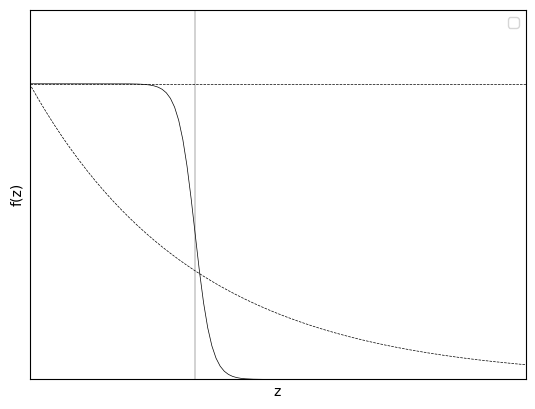

In [7]:
plt.plot(
    z_arr,
    f_exp,
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.plot(
    z_arr,
    f_tanh,
    linewidth=0.5,
    color="black",
    linestyle="solid",
)
plt.plot(
    z_arr,
    f_const,
    linewidth=0.5,
    color="black",
    linestyle="dashed",
)
plt.axvline(x=z0_b, color="black", linestyle="solid", linewidth=0.25)
plt.legend()
plt.xlabel("z")
plt.ylabel("f(z)")
plt.xticks([])
plt.yticks([])
plt.xlim([0, 3 * z0])
plt.ylim([0, 2.5 * a])
# plotname = "/Users/lilli/Desktop/Thesis_vonNeu/heightprofiles.png"
# plt.savefig(plotname, dpi=300)
plt.show()